# Claire Cofield
##### This is my portion final project for the class Big Ideas in Computing and Information. The approach I took to this project was to first find a dataset, then explore different ways to graph and evaluate the different neighborhoods of pittsburgh by the information in that dataset, and then to analyze those evaluations. 
##### The metric I chose to work with is [Pittsburgh's public water features](https://data.wprdc.org/dataset/city-water-features). I selected this metric because, when looking through the WPRDC's data on the City of Pittsburgh with CSVs available, this one stood out to me as interesting. It seemed different from the other datasets available, so I thought it would provide a unique persepctive on the neighborhoods of Pittsburgh. 
##### I chose to evaluate the water features by practicality and by visual appeal. As the report progresses, I explain the reasoning behind this choice. The conclusion analyses these results to produce a determination of "best neighborhood" based on the data. 

In [2]:
import pandas as pd
waterFeaturesData = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7",)
wfd = pd.DataFrame(waterFeaturesData)

neighborhoods = []
neighborhood = wfd["neighborhood"]
for hood in neighborhood: 
    if hood not in neighborhoods:
        neighborhoods.append(hood)
len(neighborhoods) # 65

drinks = wfd[wfd["feature_type"].str.startswith("Dr")]
sprays = wfd[wfd["feature_type"].str.startswith("Spr")]
decorations = wfd[wfd["feature_type"].str.startswith("De")]

As can be seen above, the first step was to read the data from the file into a format I could work with. After reading the CSV file into a dataframe, I selected individual columns of the data at a time to get a list of all the unique neighborhoods in Pittsburgh and to split the water features into three groups: drinking fountains, decorative fountains, and spray fountains (fountains designed for people to run through their water). 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
neighborhoods.sort()
number_of_drinking_fountains_by_neighborhood = dict.fromkeys(neighborhoods, 0)
hoods1 = drinks["neighborhood"]
for hood in hoods1:
    number_of_drinking_fountains_by_neighborhood[hood] = number_of_drinking_fountains_by_neighborhood[hood] + 1
number_of_decorative_fountains_by_neighborhood = dict.fromkeys(neighborhoods, 0)
hoods2 = decorations["neighborhood"]
for hood in hoods2:
    number_of_decorative_fountains_by_neighborhood[hood] = number_of_decorative_fountains_by_neighborhood[hood] + 1
number_of_spray_fountains_by_neighborhood = dict.fromkeys(neighborhoods, 0)
hoods2 = sprays["neighborhood"]
for hood in hoods2:
    number_of_spray_fountains_by_neighborhood[hood] = number_of_spray_fountains_by_neighborhood[hood] + 1

Next, since the goal was to determine which neighborhood was the best based on the data, I had to separate each of my data groups by neighborhood. 

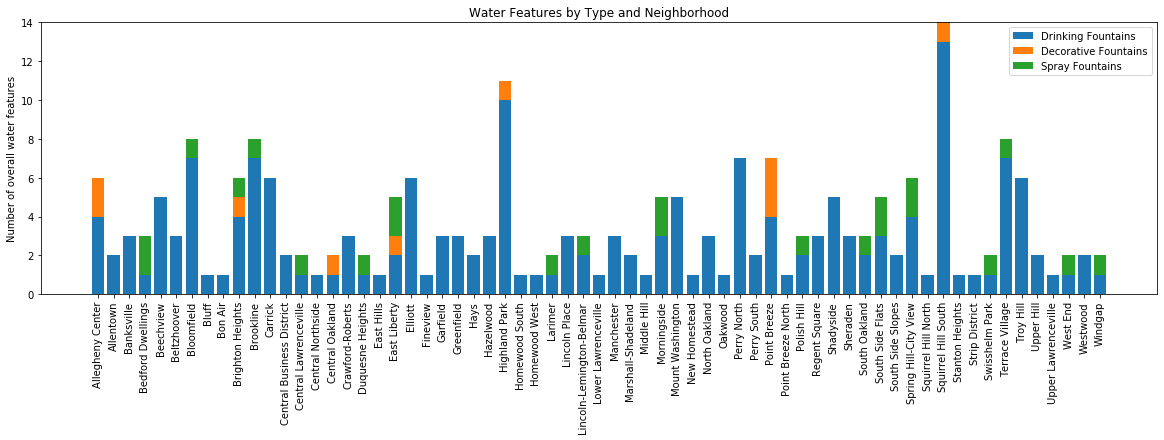

In [4]:
labels = neighborhoods
drink_numbers = [v for v in number_of_drinking_fountains_by_neighborhood.values()]
fountain_numbers = [v for v in number_of_decorative_fountains_by_neighborhood.values()]
spray_numbers = [v for v in number_of_spray_fountains_by_neighborhood.values()]
bottoms = []
n = len(neighborhoods)
for i in range(0, n):
    bottoms.append(drink_numbers[i] + fountain_numbers[i])


fig, ax = plt.subplots(figsize = (20,5))

ax.bar(labels, drink_numbers, label='Drinking Fountains')
ax.bar(labels, fountain_numbers, bottom=drink_numbers, label='Decorative Fountains')
ax.bar(labels, spray_numbers, bottom=bottoms, label='Spray Fountains')

ax.set_ylabel('Number of overall water features')
ax.set_title('Water Features by Type and Neighborhood')
ax.legend()
plt.xticks(rotation=90)


plt.show()

I chose a stacked bar graph to represent the data because both the x-axis and y-axis data were categorical. From this initial visualization, it was easy to see that the data supports Squirrel Hill South as the best neighborhood and Highland Park as the second best. However, I wanted to be able to rank all the neighborhoods against each other based on this metric, and the shorter columns seemed too close together to do that. So, I decided to weight the data. 
<br />Since each neighborhood has at least one drinking fountain, I chose to focus on the oher two feature types for wieghing. Spray fountains are really only able to serve their main purpose during warm weather parts of the year, but decorative fountains are able to provide visual appeal year-round, as they often still look nice even when shut off and snowed-on in the winter. For this reason, I chose to weigh decorative fountains higher than spray fountains. I think visual appeal is important to the dertmination of a "best" neighborhood, because when a place looks nice people will be more likely to want to spend time there. 

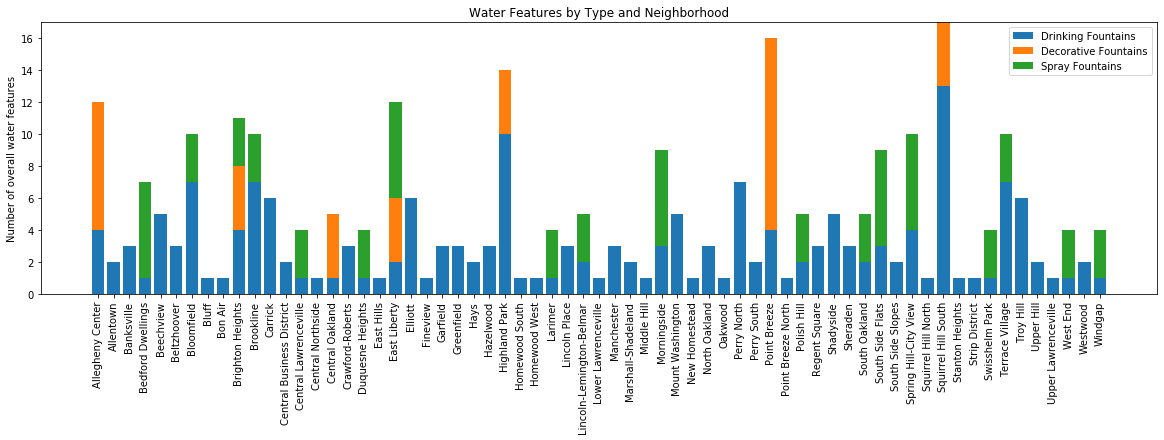

In [5]:
drink_numbers_weighted = [i*1 for i in drink_numbers]
fountain_numbers_weighted = [i * 4 for i in fountain_numbers]
spray_numbers_weighted = [i*3 for i in spray_numbers]
bottom_numbers_weighted = []
for i in range(0, n):
    bottom_numbers_weighted.append(drink_numbers_weighted[i] + fountain_numbers_weighted[i])
    
fig, ax = plt.subplots(figsize = (20,5)) 

ax.bar(labels, drink_numbers_weighted, label='Drinking Fountains')
ax.bar(labels, fountain_numbers_weighted, bottom=drink_numbers_weighted, label='Decorative Fountains')
ax.bar(labels, spray_numbers_weighted, bottom=bottom_numbers_weighted, label='Spray Fountains')

ax.set_ylabel('Number of overall water features')
ax.set_title('Water Features by Type and Neighborhood')
ax.legend()
plt.xticks(rotation=90)


plt.show()

Even with the weighting, Squirrel Hill South was still the clear winner. However, the weights did add more variation in the heights of the shorter bars, which makes visual comparison easier. 
<br /> The weighting also changed the relative neighborhood rankings. It pushed Highland Park to third, and made Point Breeze second. I had to think of a way to reconcile the differences between the weighted and unweighted rankings. 

In [7]:
aesthetic_scores = []
for i in range(0, n):
    aesthetic_scores.append(bottom_numbers_weighted[i] + spray_numbers_weighted[i])
practical_scores = []
for i in range(0, n):
    practical_scores.append(bottoms[i] + spray_numbers[i])

Drinking fountains add practical value to a neighborhood, but since they were so ubiquitous in the unweighted data, I did not give them much weight in the weighted data. For this reason, I decided to count each neighborhood's score from the unweighted data as its "practical score" and each neighborhood's data from the weighted score as its "aesthetic score". The "best" neighborhood should look nice, but it should also have practical amenities. To balance these, I decided that the best way to combine the two measurement systems was simply to average each neighborhood's  aesthetic and practical scores. 

In [8]:
final_scores = []
for i in range(0, n):
    final_scores.append((aesthetic_scores[i] + practical_scores[i])/31*100)
final_scores_by_neighborhood = dict(zip(labels, final_scores))
final_scores_by_neighborhood

{'Allegheny Center': 58.06451612903226,
 'Allentown': 12.903225806451612,
 'Banksville': 19.35483870967742,
 'Bedford Dwellings': 32.25806451612903,
 'Beechview': 32.25806451612903,
 'Beltzhoover': 19.35483870967742,
 'Bloomfield': 58.06451612903226,
 'Bluff': 6.451612903225806,
 'Bon Air': 6.451612903225806,
 'Brighton Heights': 54.83870967741935,
 'Brookline': 58.06451612903226,
 'Carrick': 38.70967741935484,
 'Central Business District': 12.903225806451612,
 'Central Lawrenceville': 19.35483870967742,
 'Central Northside': 6.451612903225806,
 'Central Oakland': 22.58064516129032,
 'Crawford-Roberts': 19.35483870967742,
 'Duquesne Heights': 19.35483870967742,
 'East Hills': 6.451612903225806,
 'East Liberty': 54.83870967741935,
 'Elliott': 38.70967741935484,
 'Fineview': 6.451612903225806,
 'Garfield': 19.35483870967742,
 'Greenfield': 19.35483870967742,
 'Hays': 12.903225806451612,
 'Hazelwood': 19.35483870967742,
 'Highland Park': 80.64516129032258,
 'Homewood South': 6.45161290322

To be better able to combine my metric with the metrics of my group, I normalized the data to be on a scale of positive numbers up to 100. Running the above cell gives the final results of my metric, listing each neighborhood alphabetically and showing their scores. 

In [9]:
neighborhoods_by_final_score = sorted(final_scores_by_neighborhood.items(), key=lambda x: -x[1])
neighborhoods_by_final_score

[('Squirrel Hill South', 100.0),
 ('Highland Park', 80.64516129032258),
 ('Point Breeze', 74.19354838709677),
 ('Allegheny Center', 58.06451612903226),
 ('Bloomfield', 58.06451612903226),
 ('Brookline', 58.06451612903226),
 ('Terrace Village', 58.06451612903226),
 ('Brighton Heights', 54.83870967741935),
 ('East Liberty', 54.83870967741935),
 ('Spring Hill-City View', 51.61290322580645),
 ('Morningside', 45.16129032258064),
 ('Perry North', 45.16129032258064),
 ('South Side Flats', 45.16129032258064),
 ('Carrick', 38.70967741935484),
 ('Elliott', 38.70967741935484),
 ('Troy Hill', 38.70967741935484),
 ('Bedford Dwellings', 32.25806451612903),
 ('Beechview', 32.25806451612903),
 ('Mount Washington', 32.25806451612903),
 ('Shadyside', 32.25806451612903),
 ('Lincoln-Lemington-Belmar', 25.806451612903224),
 ('Polish Hill', 25.806451612903224),
 ('South Oakland', 25.806451612903224),
 ('Central Oakland', 22.58064516129032),
 ('Banksville', 19.35483870967742),
 ('Beltzhoover', 19.35483870967

To see the "best" neighborhood more clearly, I arranged the data to display neighborhoods by their score. Running the above cell will display the neighborhoods and their scores, going in order of decreasing score. Squirrel Hill South is still undeniably the winner. Highland Park has gone back to second, but Point Breeze is a close third, showing that both the aesthetic and practical scores had influence. 

### Conclusion: 
My group found that the overall "best" neighborhood in Pittsburgh was Allegheny Center. This is different from my personal determination of "best" neighborhood, Squirrel Hill South. However, this is to be expected, as we counted walkability as 70% of a neighborhood's combined score and water features as only 30%, since walkability counts a person in the neighborhood's ability to walk to any amenity, not just to water-based ones. 
<br />Even baesd on the combined scores, Squirrel Hill South still placed as one of the top five neighborhoods, comming in at number 4. Coincidentally, the overall winner placed 4th based on my personal metric. So, while the results do differ, I think the "best" neighborhoods decided upon by my personal metric and by my group's overall metric are great neighborhoods in both metrics. 

The group spreadsheet of overall scores can be found [here](https://docs.google.com/spreadsheets/d/1YuotqecZfZQr8ReB8cMeU2rhfhm3JHA-UfQ12guTZ5U/edit) 